<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_09_Desicion_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Algoritmo CART (classification and regresion tree)

Se busca entrenar un modelo para categorizar la información encontrando la frontera de desición, permite tener una mejor interpretabilidad que las redes neuronales dado que se puede tener una represetancion grafica del proceso de desiscion secuencial.

- ref https://www.youtube.com/watch?v=kqaLlte6P6o&ab_channel=CodificandoBits
- Hand on Machine leargning 




Dado un conjunto de caracteristicas se establece una condición que realiza 
una particion binaria de los datos a clasificar repitiendo hasta encontrar 
particiones lo más homogenea posible.




In [14]:
#X0, y0 = make_classification(n_samples=20,#
#    n_features=2, n_redundant=0, n_informative=1, random_state=1, 
#    n_clusters_per_class=1)
#
#x=np.arange(-2, 3,1)
#x_,y_ = np.meshgrid(x,x)
#
#fig, ax = plt.subplots()
#ax.plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
#ax.plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)
##ax.plot(x_,y_,"k.")
#
#ax.axvline(x = 1, color = 'm', label="x1<=1")
#ax.axhline(y = 0.2, color = 'y', label="x2<0.2")
#ax.axvline(x = 0.0, color = 'k', label="x2<0.2")
##plt.legend(loc=3)
#plt.xlabel("$X_1$")
#plt.ylabel("$X_2$")


- Gini index


$G = 1 - (PC_1)^2 - (PC_2)^2$

$PC_1$: Probablidad categoria 1 

$PC_2$: Probablidad categoria 2 

Si :

- $G=0$ nodos puros, datos que pertenecen a una sola categoría

- Gini > 0 son nodos con impurezas, con mas de una categoría


La partición purpura  y amarilla del gráfico anterior representan nodos puros.

Mientras que la linea negra define:

- 7 puntos son de color azul.

- 6 puntos de color rojo.

$G = 1 - (7/13)^{2} - (6/13)^{2}$

mientrás que la ponderacion viene dada por:

$m = (7/20+7/20)=7/10$



No:

$G=1-(3/7)^{2}-(4/7)^{2}$
m = (3/20+4/20)


La funcion de coste, asocida al nodo padre:

$J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right} $



# Algoritmo
1. Calcular todos los posibles condiciones. 
2. Calcular los indices de Gini.
3. Encontrar la funcion de coste 
4. Escoger la menor funcion de coste 
5. Repetir.


# Laboratorio

1. Importar iris dataset 
2. Generar una intuición respecto a iris dataset. Ver laboratorio anterior.
3. Dividir el *dataset* empleanto el metodo train_test_split de sklearn
4. Dentro de sklearn, aplicar el algoritmo DecisionTreeClassifier.
5. Para el clasificador analice el gráfico de desición:

```

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

  fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
  graph=tree.plot_tree(clf,class_names = iris.target_names,\
                feature_names = iris.feature_names,\
                impurity=False, filled=True,rounded=True )

```

6. Características importantes.

```
clf.feature_importances_
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()
```

7. Fronteras de desición.



```
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()
```


In [15]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz
#from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree


In [16]:
iris = load_iris()
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [17]:
X = iris.data
y = iris.target

print(f"Forma de los datos: {X.shape}")
print(f"Clases: {iris.target_names}")
print(f"Características: {iris.feature_names}")
print(f"Distribución de clases: {np.bincount(y)}")


Forma de los datos: (150, 4)
Clases: ['setosa' 'versicolor' 'virginica']
Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Distribución de clases: [50 50 50]


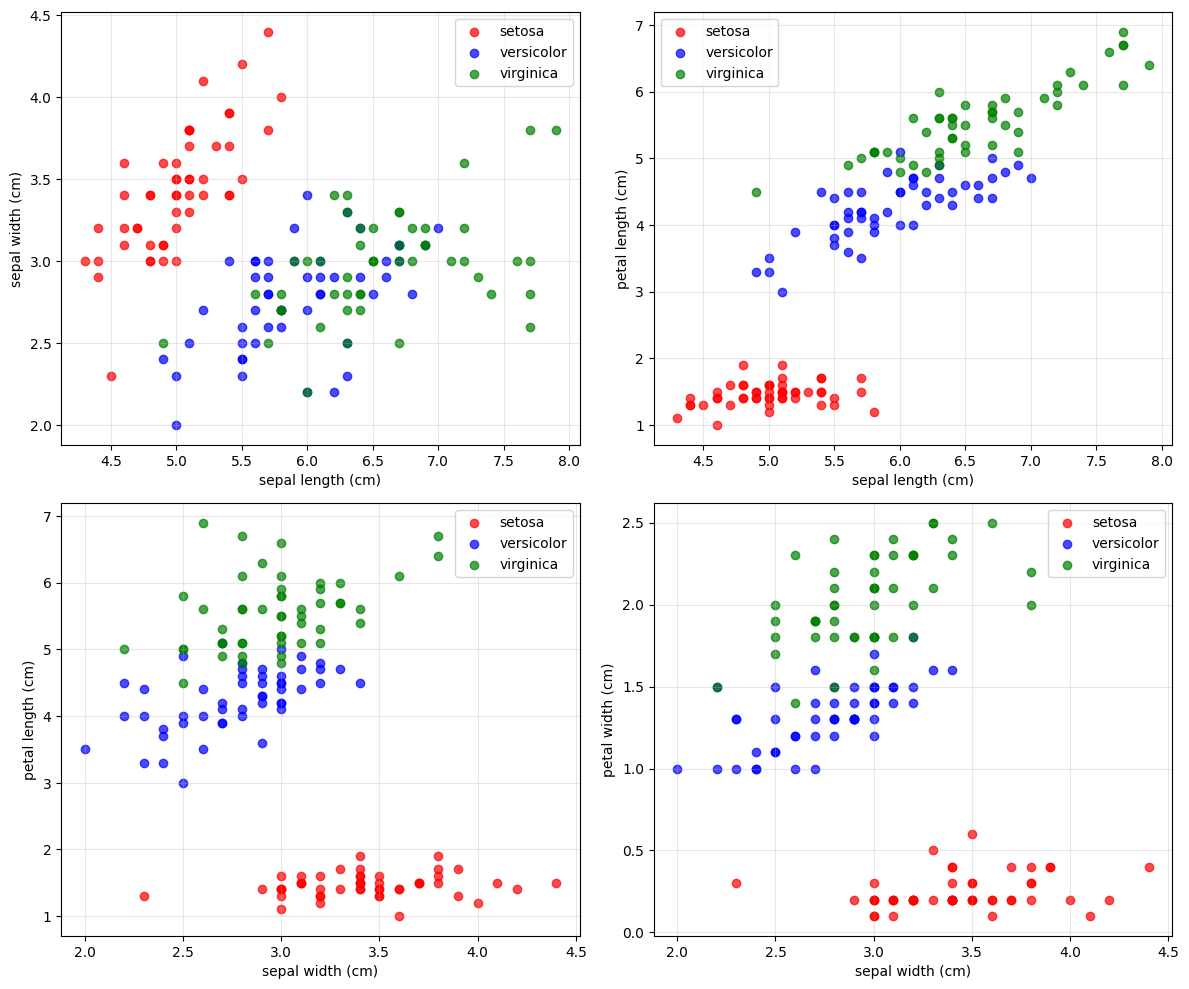

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
colors = ['red', 'blue', 'green']
target_names = iris.target_names

for idx, pair in enumerate(pairs):
    row = idx // 3
    col = idx % 3
    if row < 2 and col < 2:
        for i, color in enumerate(colors):
            axes[row, col].scatter(X[y == i, pair[0]], X[y == i, pair[1]], 
                                 c=color, label=target_names[i], alpha=0.7)
        axes[row, col].set_xlabel(iris.feature_names[pair[0]])
        axes[row, col].set_ylabel(iris.feature_names[pair[1]])
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño conjunto entrenamiento: {X_train.shape}")
print(f"Tamaño conjunto prueba: {X_test.shape}")


Tamaño conjunto entrenamiento: (120, 4)
Tamaño conjunto prueba: (30, 4)


In [20]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

print(f"Precisión en entrenamiento: {clf.score(X_train, y_train):.4f}")
print(f"Precisión en prueba: {clf.score(X_test, y_test):.4f}")


Precisión en entrenamiento: 1.0000
Precisión en prueba: 1.0000


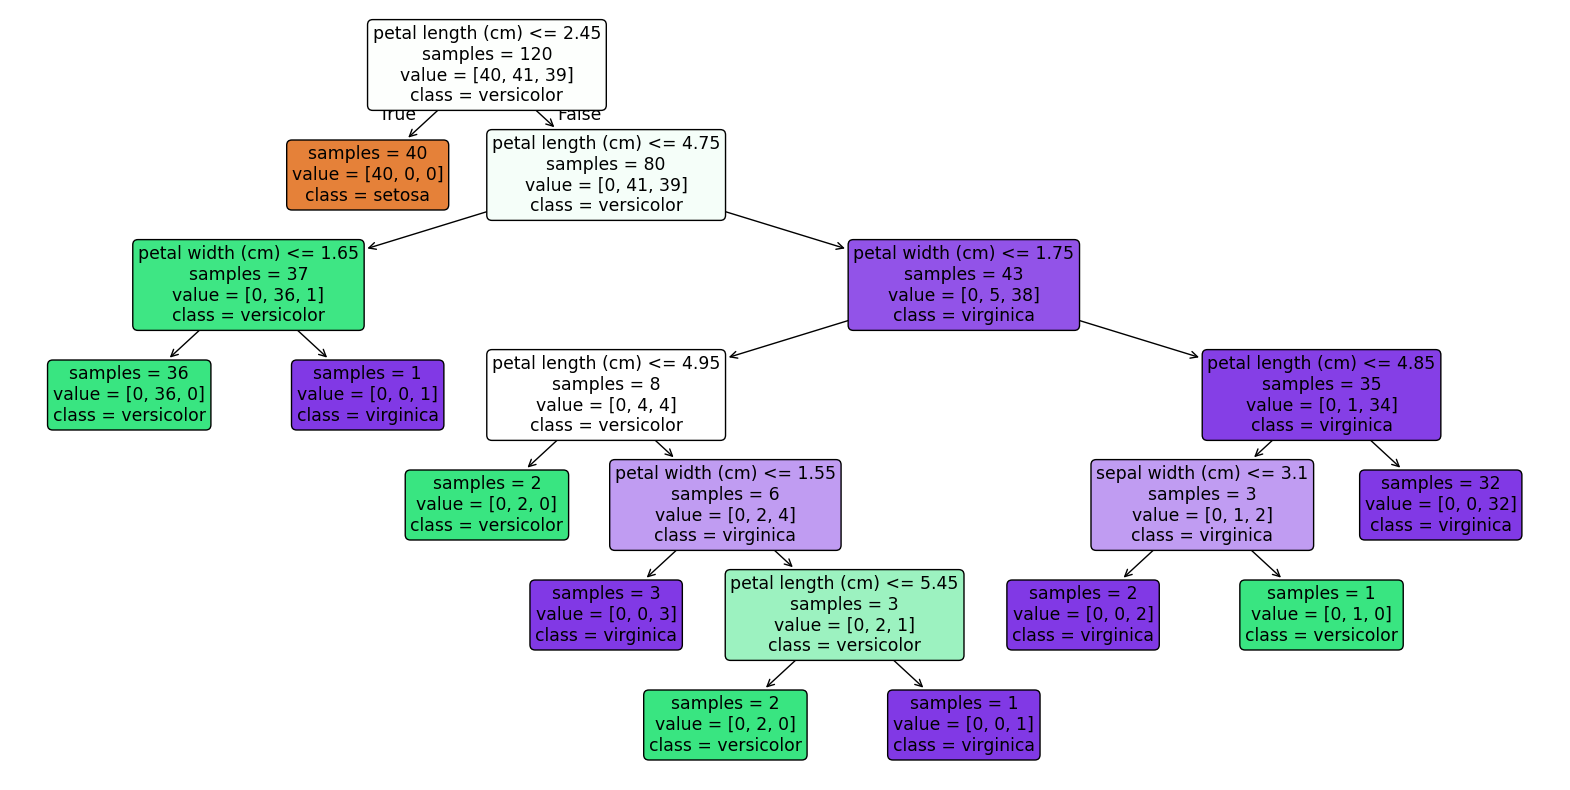

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
tree.plot_tree(clf, class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=False, filled=True, rounded=True)
plt.show()


Importancia de características:
sepal length (cm): 0.0000
sepal width (cm): 0.0167
petal length (cm): 0.9061
petal width (cm): 0.0772


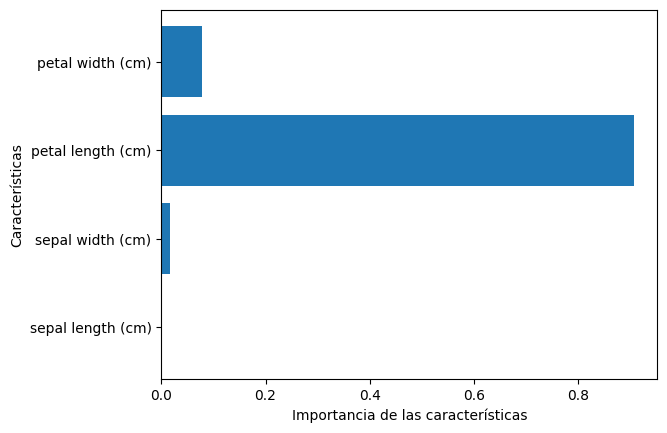

In [22]:
print("Importancia de características:")
for i, (name, importance) in enumerate(zip(iris.feature_names, clf.feature_importances_)):
    print(f"{name}: {importance:.4f}")

caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract), iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()


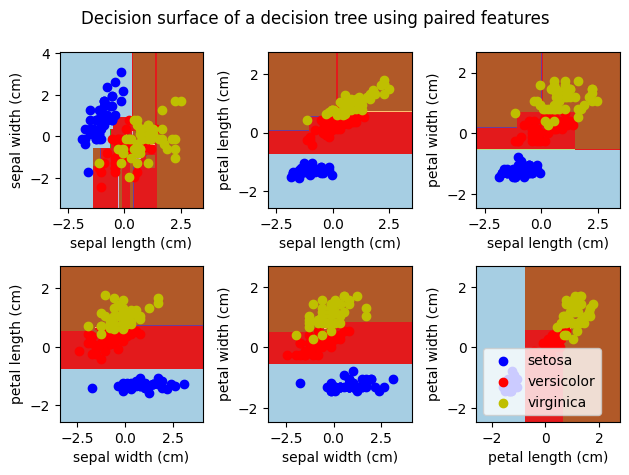

In [23]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

iris_data = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris_data.data[:, pair]
    y = iris_data.target

    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    clf = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)
  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris_data.feature_names[pair[0]])
    plt.ylabel(iris_data.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris_data.target_names[i])

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.tight_layout()
plt.show()
